In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Example Python script to extract tables from the CEI PDF (specifically from Appendix A)
and produce a cleaned DataFrame with the following columns:
 - Company (the list of companies)
 - CEI_Rating (the company rating for that year)
 - Publication Date (the date the report was published for that year)
 - Location (company location, later used for state classification)
 - stable_id (a unique identifier for each company)
 - public_flag (set to 1 if the company appears to be publicly traded)
 
Notes:
 - This example uses Camelot (with the “stream” flavor) to extract tables.
 - Adjust the page range (pages="45-50") as needed to target the pages containing Appendix A.
 - The heuristic for “public_flag” is basic and may need adjustment.
"""

import camelot
import pandas as pd

# Path to the PDF file (ensure the file is accessible)
pdf_file = "CEI_2014_final_draft_7.pdf"

# Extract all tables from a specific range of pages (adjust pages as necessary)
tables = camelot.read_pdf(pdf_file, pages="45-50", flavor="stream")

# Combine tables from the specified pages into one DataFrame
if tables:
    df_list = [t.df for t in tables]
    df_raw = pd.concat(df_list, ignore_index=True)
else:
    raise ValueError("No tables were found in the specified pages.")

# Print a preview of the raw extracted table
print("Raw extracted table head:")
print(df_raw.head())

# Assume the first row contains headers; assign them as column names
df_raw.columns = df_raw.iloc[0]
df = df_raw[1:].reset_index(drop=True)

# Strip whitespace from column names
df.columns = [col.strip() for col in df.columns]
print("Columns in extracted table:", df.columns.tolist())

# If "Publication Date" is missing, create it with a default value (adjust if known)
if "Publication Date" not in df.columns:
    df["Publication Date"] = "2014-XX-XX"  # Replace with actual publication date if known

# Select desired columns. Adjust column names if needed based on the extracted table.
# Here, we assume the company name is under "Employer" and the location under "Employer Headquarters Location".
desired_columns = ["Employer", "Rating", "Publication Date", "Employer Headquarters Location"]
df_clean = df[desired_columns].copy()

# Rename columns for clarity
df_clean.rename(columns={
    "Employer": "Company",
    "Rating": "CEI_Rating",
    "Employer Headquarters Location": "Location"
}, inplace=True)

# Add a stable identifier (a simple incremental integer ID)
df_clean["stable_id"] = range(1, len(df_clean) + 1)

# Define a basic heuristic to determine if a company is publicly traded
def is_public(company_name):
    public_keywords = ["Inc", "Corp", "Co", "LLC", "PLC", "Group"]
    for kw in public_keywords:
        if kw.lower() in company_name.lower():
            return 1
    return 0

df_clean["public_flag"] = df_clean["Company"].apply(is_public)

# Convert CEI_Rating to numeric, coercing errors (if any)
df_clean["CEI_Rating"] = pd.to_numeric(df_clean["CEI_Rating"], errors="coerce")

# Rearrange columns in the desired order
final_columns = ["stable_id", "Company", "CEI_Rating", "Publication Date", "Location", "public_flag"]
df_final = df_clean[final_columns]

# Print the final DataFrame
print("Final extracted DataFrame:")
print(df_final.head())

# Optionally, save the final DataFrame to a CSV file
df_final.to_csv("extracted_CEI_table.csv", index=False)


Raw extracted table head:
                                                  0   \
0                                         Appendices   
1  C O R P O R AT E   E Q UA L I T Y   I N D E X ...   
2           Corporate Equality Index Rating Criteria   
3                                                 1a   
4                                                 1b   

                                                  1    2    3    4    5    6   \
0                                                     NaN  NaN  NaN  NaN  NaN   
1                                                 43  NaN  NaN  NaN  NaN  NaN   
2                                                     NaN  NaN  NaN  NaN  NaN   
3  Prohibits Discrimination Based on Sexual Orien...  NaN  NaN  NaN  NaN  NaN   
4  Prohibits Discrimination Based on Gender Ident...  NaN  NaN  NaN  NaN  NaN   

    7    8    9    10   11   12   13   14  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  

AttributeError: 'float' object has no attribute 'strip'

In [4]:
df

,Appendices,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Publication Date
0,C O R P O R AT E E Q UA L I T Y I N D E X ...,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-XX-XX
1,Corporate Equality Index Rating Criteria,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-XX-XX
2,1a,Prohibits Discrimination Based on Sexual Orien...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-XX-XX
3,1b,Prohibits Discrimination Based on Gender Ident...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-XX-XX
4,2a,Offers Partner Health/Medical Insurance (15 po...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-XX-XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MetLife Inc.,"New York, NY",,,,,,,,,,100,100,34,,2014-XX-XX
385,,,l,l,l,l,l,l,l,l,,,,,,2014-XX-XX
386,MGM Resorts International,"Las Vegas, NV",,,,,,,,,,100,100,331,,2014-XX-XX
387,,,l,l,l,l,l,l,l,l,,,,,,2014-XX-XX


In [22]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Example Python script to extract tables from the CEI PDF (specifically from Appendix A)
and produce a cleaned DataFrame with the following columns:
 - Company (the list of companies)
 - CEI_Rating (the company rating for that year)
 - Publication Date (the date the report was published for that year)
 - Location (company location, later used for state classification)
 - stable_id (a unique identifier for each company)
 - public_flag (set to 1 if the company appears to be publicly traded)
 
Notes:
 - This example uses Camelot (with the “stream” flavor) to extract tables.
 - Adjust the page range (pages="45-50") as needed to target the pages containing Appendix A.
 - The heuristic for “public_flag” is basic and may need adjustment.
"""

import camelot
import pandas as pd

# Path to the PDF file (ensure the file is accessible)
pdf_file_name = "CEI_2014_final_draft_7.pdf"

def extract_table(pdf_file_name):
    # Extract all tables from a specific range of pages (adjust pages as necessary)
    tables = camelot.read_pdf(pdf_file_name, pages="45-50", flavor="stream")

    # Combine tables from the specified pages into one DataFrame
    if tables:
        df_list = [t.df for t in tables]
        df_raw = pd.concat(df_list, ignore_index=True)
    else:
        raise ValueError("No tables were found in the specified pages.")

    # Print a preview of the raw extracted table
    print("Raw extracted table head:")
    print(df_raw.head())

    # Assume the first row contains headers; assign them as column names
    df_raw.columns = df_raw.iloc[0]
    df = df_raw[1:].reset_index(drop=True)

    # Convert all column names to strings and strip whitespace to avoid the AttributeError
    df.columns = [str(col).strip() for col in df.columns]
    print("Columns in extracted table:", df.columns.tolist())

    return df
    # # If "Publication Date" is missing, create it with a default value (adjust if known)
    # if "Publication Date" not in df.columns:
    #     df["Publication Date"] = "2014-XX-XX"  # Replace with actual publication date if known


In [23]:
df = extract_table(pdf_file_name)

Raw extracted table head:
                                                  0   \
0                                         Appendices   
1  C O R P O R AT E   E Q UA L I T Y   I N D E X ...   
2           Corporate Equality Index Rating Criteria   
3                                                 1a   
4                                                 1b   

                                                  1    2    3    4    5    6   \
0                                                     NaN  NaN  NaN  NaN  NaN   
1                                                 43  NaN  NaN  NaN  NaN  NaN   
2                                                     NaN  NaN  NaN  NaN  NaN   
3  Prohibits Discrimination Based on Sexual Orien...  NaN  NaN  NaN  NaN  NaN   
4  Prohibits Discrimination Based on Gender Ident...  NaN  NaN  NaN  NaN  NaN   

    7    8    9    10   11   12   13   14  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  

In [ ]:

# Select desired columns. Adjust column names if needed based on the extracted table.
# Here, we assume the company name is under "Employer" and the location under "Employer Headquarters Location".
desired_columns = ["Employer", "Rating", "Publication Date", "Employer Headquarters Location"]
df_clean = df[desired_columns].copy()

# Rename columns for clarity
df_clean.rename(columns={
    "Employer": "Company",
    "Rating": "CEI_Rating",
    "Employer Headquarters Location": "Location"
}, inplace=True)

# Add a stable identifier (a simple incremental integer ID)
df_clean["stable_id"] = range(1, len(df_clean) + 1)

# Define a basic heuristic to determine if a company is publicly traded
def is_public(company_name):
    public_keywords = ["Inc", "Corp", "Co", "LLC", "PLC", "Group"]
    for kw in public_keywords:
        if kw.lower() in company_name.lower():
            return 1
    return 0

df_clean["public_flag"] = df_clean["Company"].apply(is_public)

# Convert CEI_Rating to numeric, coercing errors (if any)
df_clean["CEI_Rating"] = pd.to_numeric(df_clean["CEI_Rating"], errors="coerce")

# Rearrange columns in the desired order
final_columns = ["stable_id", "Company", "CEI_Rating", "Publication Date", "Location", "public_flag"]
df_final = df_clean[final_columns]

# Print the final DataFrame
print("Final extracted DataFrame:")
print(df_final.head())

# Optionally, save the final DataFrame to a CSV file
df_final.to_csv("extracted_CEI_table.csv", index=False)


In [25]:
df.columns = df.iloc[17,:]
df.iloc[18:,:]

17,Employer,Headquarters Location,15 points\n1a,15 points\n1b,15 points\n2a,10 points\n2b,10 points\n2c,10 points\n3a,10 points\n3b,15 points\n4,-25 points l\n5,2014 CEI Rating,2013 CEI Rating,Fortune 1000,AmLaw 200
18,,,l,l,l,l,l,l,l,l,,,,,
19,3M Co.,"St. Paul, MN",,,,,,,,,,100,100,102,
20,,,l,l,l,l,l,l,l,l,,,,,
21,A.T. Kearney Inc.,"Chicago, IL",,,,,,,,,,100,100,,
22,,,l,l,l,l,l,l,l,l,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MetLife Inc.,"New York, NY",,,,,,,,,,100,100,34,
385,,,l,l,l,l,l,l,l,l,,,,,
386,MGM Resorts International,"Las Vegas, NV",,,,,,,,,,100,100,331,
387,,,l,l,l,l,l,l,l,l,,,,,


In [7]:
import camelot
print(dir(camelot))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__']


In [ ]:
# !pip uninstall camelot
# !pip uninstall camelot-py
# !pip install "camelot-py[cv]"

Found existing installation: Camelot 12.6.29
Uninstalling Camelot-12.6.29:
  Would remove:
    /Users/guy/.pyenv/versions/3.10.9/bin/camelot_admin
    /Users/guy/.pyenv/versions/3.10.9/bin/camelot_example
    /Users/guy/.pyenv/versions/3.10.9/bin/camelot_mini_example
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/camelot-12.6.29.dist-info/*
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/camelot/*
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/camelot_example/*
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/doc/sphinx/source/_static/action_button.png
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/doc/sphinx/source/_static/admin_classes.png
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/doc/sphinx/source/_static/budget.png
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/doc/sphinx/source/_static/camelot-new-project.png
    /Users/guy/.pyenv/versions/3

In [26]:
cei2020 = 'CEI-2020.pdf'
df = extract_table(cei2020)

Raw extracted table head:
                                    0                                     1   \
0                  CEI Rating Criteria                              Employer   
1  1a   Prohibits discrimination based  Federal Reserve Bank of Philadelphia   
2        on sexual orientation for all                                         
3               operations (15 points)      Federal Reserve Bank of Richmond   
4        1b   Prohibits discrimination                                         

                       2      3              4              5              6   \
0  Headquarters  Location  State  15 points\n1a  15 points\n1b  10 points\n2a   
1            Philadelphia     PA              2              2              2   
2                                                                               
3                Richmond     VA              2              2              2   
4                                                                               

      

In [27]:
df

,CEI Rating Criteria,Employer,Headquarters Location,State,15 points\n1a,15 points\n1b,10 points\n2a,10 points\n2b,10 points\n2c,10 points\n3a,10 points\n3b,15 points\n3c,5 points\n3d,-25 points\n4,2020 \nCEI Rating,2019 \nCEI Rating,Fortune 1000
0,1a Prohibits discrimination based,Federal Reserve Bank of Philadelphia,Philadelphia,PA,2,2,2,2,2,2,2,2,2,,100,100,
1,on sexual orientation for all,,,,,,,,,,,,,,,,
2,operations (15 points),Federal Reserve Bank of Richmond,Richmond,VA,2,2,2,2,2,2,2,2,2,,100,100,
3,1b Prohibits discrimination,,,,,,,,,,,,,,,,
4,based on gender identity for,Federal Reserve Bank of San Francisco,San Francisco,CA,2,2,2,2,2,2,2,2,2,,100,100,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,,McKinsey & Co. Inc.,New York,NY,2,2,2,2,2,2,2,2,2,,100,100,
373,,Medallia Inc.,San Francisco,CA,2,2,2,2,2,2,2,2,2,,100,100,
374,,Medidata Solutions Inc.,New York,NY,2,2,2,2,2,2,2,2,2,,100,100,
375,,Medtronic PLC,Minneapolis,MN,2,2,2,2,2,2,2,2,2,,100,90,173


In [34]:
import os
import re
import camelot
import pandas as pd

def extract_table(pdf_file_name):
    """
    Extracts and cleans the CEI table from the specified PDF file.
    Assumes that the table (e.g. Appendix A) is located on pages 45-50.
    
    Returns:
        A pandas DataFrame with columns:
            - stable_id: a unique incremental identifier
            - Company: the company name
            - CEI_Rating: the company’s CEI rating (numeric)
            - Publication Date: the report publication date (default if not found)
            - Location: company headquarters location
            - public_flag: 1 if the company appears to be publicly traded, 0 otherwise
    """
    # Extract tables from pages 45-50 (adjust as needed)
    tables = camelot.read_pdf(pdf_file_name, pages="45-50", flavor="stream")
    if tables:
        df_list = [t.df for t in tables]
        df_raw = pd.concat(df_list, ignore_index=True)
    else:
        raise ValueError(f"No tables were found in {pdf_file_name} in the specified pages.")
    
    # Assume the first row of df_raw contains header information
    df_raw.columns = df_raw.iloc[0]
    df = df_raw[1:].reset_index(drop=True)
    
    # Convert all column names to strings and strip extra whitespace
    df.columns = [str(col).strip() for col in df.columns]
    print("Extracted columns from file:", pdf_file_name, "->", df.columns.tolist())
    
    # If Publication Date is missing, add a default value (adjust as needed)
    if "Publication Date" not in df.columns:
        df["Publication Date"] = "2014-XX-XX"  # change this if you have the actual date
    
    # # Select columns of interest. Adjust these names if necessary based on the PDF extraction.
    # desired_columns = ["Employer", "Rating", "Publication Date", "Employer Headquarters Location"]
    # df_clean = df[desired_columns].copy()
    
    # # Rename columns for clarity
    # df_clean.rename(columns={
    #     "Employer": "Company",
    #     "Rating": "CEI_Rating",
    #     "Employer Headquarters Location": "Location"
    # }, inplace=True)
    
    # # Add a stable identifier column
    # df_clean["stable_id"] = range(1, len(df_clean) + 1)
    
    # # Define a basic heuristic for public companies
    # def is_public(company_name):
    #     public_keywords = ["Inc", "Corp", "Co", "LLC", "PLC", "Group"]
    #     for kw in public_keywords:
    #         if kw.lower() in company_name.lower():
    #             return 1
    #     return 0

    # df_clean["public_flag"] = df_clean["Company"].apply(is_public)
    
    # # Convert CEI_Rating to numeric (coerce non-numeric values to NaN)
    # df_clean["CEI_Rating"] = pd.to_numeric(df_clean["CEI_Rating"], errors="coerce")
    
    # Rearrange columns in the desired order
    # final_columns = ["stable_id", "Company", "CEI_Rating", "Publication Date", "Location", "public_flag"]
    # df_final = df_clean[final_columns]
    return df

def find_pdfs_in_folder(folder_path):
    """
    Recursively finds all PDF files in the given folder.
    
    Args:
        folder_path (str): The directory to search in.
        
    Returns:
        A list of full paths to PDF files.
    """
    pdf_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(".pdf"):
                pdf_files.append(os.path.join(root, file))
    return pdf_files

# Main script
if __name__ == "__main__":
    # Specify the folder to search for PDFs (adjust as needed)
    folder_path = "./"  # current directory; change if PDFs are in another folder
    all_pdfs = find_pdfs_in_folder(folder_path)
    
    # Filter for PDFs that are CEI magazines (assuming file names contain 'cei')
    cei_pdfs = [pdf for pdf in all_pdfs if "cei" in pdf.lower()]
    print("Found CEI PDF files:")
    for pdf in cei_pdfs:
        print(" -", pdf)
    
    # Process each CEI PDF file and store the extracted table in a dictionary keyed by year
    extracted_tables = {}
    for pdf in cei_pdfs:
        try:
            df = extract_table(pdf)
            # Attempt to extract a 4-digit year from the file name
            match = re.search(r'(\d{4})', pdf)
            year = match.group(1) if match else "unknown"
            extracted_tables[year] = df
            print(f"Successfully extracted table for year {year} from {pdf}")
        except Exception as e:
            print(f"Failed to extract table from {pdf}: {e}")
    
    # Optionally, combine all individual DataFrames into one with an extra 'Year' column
    combined_dfs = []
    for year, df in extracted_tables.items():
        df["Year"] = year
        combined_dfs.append(df)
    
    if combined_dfs:
        combined_table = pd.concat(combined_dfs, ignore_index=True)
        combined_table.to_csv("combined_CEI_tables.csv", index=False)
        print("Combined table saved to 'combined_CEI_tables.csv'")
    else:
        print("No tables were successfully extracted.")


Found CEI PDF files:
 - ./CEI-2018-FullReport.pdf
 - ./CEI-2020.pdf
 - ./CEI-2019-FullReport.pdf
 - ./CEI-2017-Final.pdf
Extracted columns from file: ./CEI-2018-FullReport.pdf -> ['', 'CEI Rating Criteria', 'Employer', 'Headquarters  Location', 'State', '15 points\n1a', '15 points\n1b', '5 points\n1c', '10 points\n2a', '10 points\n2b', '10 points\n2c', '10 points\n3a', '10 points\n3b', '15 points\n4', '-25 points\n5', '2018  \nCEI Rating', '2017  \nCEI Rating', 'Fortune 1000']
Successfully extracted table for year 2018 from ./CEI-2018-FullReport.pdf
Extracted columns from file: ./CEI-2020.pdf -> ['CEI Rating Criteria', 'Employer', 'Headquarters  Location', 'State', '15 points\n1a', '15 points\n1b', '10 points\n2a', '10 points\n2b', '10 points\n2c', '10 points\n3a', '10 points\n3b', '15 points\n3c', '5 points\n3d', '-25 points\n4', '2020  \nCEI Rating', '2019  \nCEI Rating', 'Fortune 1000']
Successfully extracted table for year 2020 from ./CEI-2020.pdf
Extracted columns from file: ./CEI

In [89]:
def is_public_heuristic(company_name):
    public_indicators = ["Inc", "Corp", "Corporation", "Limited", "Ltd", "LLC", "PLC", "Group", "Holdings", "NV", "SA", "AG"]
    private_indicators = ["LLP", "LP", "Private", "Partners"]

    name_lower = company_name.lower()

    if any(keyword.lower() in name_lower for keyword in private_indicators):
        return 0  # Explicitly private indicators
    if any(keyword.lower() in name_lower for keyword in public_indicators):
        return 1  # Explicitly public indicators
    else:
        return -1  # Default assumption is private if uncertain

# Example
print(is_public_heuristic("Apple"))        # returns 1
print(is_public_heuristic("Baker & Partners LLP"))  # returns 0


-1
0


In [93]:
for i,cdf in enumerate(combined_dfs):
    # Remove rows with empty or NaN Company names
    cdf = cdf[cdf["Employer"].notna() & (cdf["Employer"].str.strip() != "")]
    cdf['isPublic'] = 0

    # Apply this function to each row in the Employer column and create a new column 'isPublic'
    cdf['isPublic'] = cdf['Employer'].apply(lambda x: is_public_heuristic(x) if pd.notnull(x) else -1)

    # Check the results
    print(cdf[['Employer', 'isPublic']].head())

    combined_dfs[i] = cdf


                          Employer  isPublic
0                 Consumers Energy        -1
3                  Convergys Corp.         1
5                       Cooley LLP         0
8                     Corning Inc.         1
11  Cosmopolitan of Las Vegas, The        -1
                                Employer  isPublic
0   Federal Reserve Bank of Philadelphia         0
2       Federal Reserve Bank of Richmond        -1
4  Federal Reserve Bank of San Francisco         1
6       Federal Reserve Bank of St Louis        -1
9                     Fenwick & West LLP         0
                                  Employer  isPublic
0                  Shearman & Sterling LLP         0
2                            Shell Oil Co.        -1
4  Sheppard, Mullin, Richter & Hampton LLP         0
6                 Shook, Hardy & Bacon LLP         0
8                        Sidley Austin LLP         0
                                            Employer  isPublic
0  Federal National Mortgage Association (F

/var/folders/3d/jm76jwsd4sd7wg__2pckn8l80000gn/T/ipykernel_27443/3842954428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['isPublic'] = 0
/var/folders/3d/jm76jwsd4sd7wg__2pckn8l80000gn/T/ipykernel_27443/3842954428.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['isPublic'] = cdf['Employer'].apply(lambda x: is_public_heuristic(x) if pd.notnull(x) else -1)
/var/folders/3d/jm76jwsd4sd7wg__2pckn8l80000gn/T/ipykernel_27443/3842954428.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [94]:
combined_dfs[0]

,,CEI Rating Criteria,Employer,Headquarters Location,State,15 points\n1a,15 points\n1b,5 points\n1c,10 points\n2a,10 points\n2b,...,10 points\n3a,10 points\n3b,15 points\n4,-25 points\n5,2018 \nCEI Rating,2017 \nCEI Rating,Fortune 1000,Publication Date,Year,isPublic
0,,,Consumers Energy,Jackson,MI,2,2,2,2,2,...,2,2,2,,100,95,403,2014-XX-XX,2018,-1
3,,,Convergys Corp.,Cincinnati,OH,2,2,2,2,2,...,2,2,2,,100,100,744,2014-XX-XX,2018,1
5,,,Cooley LLP,Palo Alto,CA,2,2,2,2,2,...,2,2,2,,100,100,,2014-XX-XX,2018,0
8,,,Corning Inc.,Corning,NY,2,2,2,2,2,...,2,2,2,,100,100,313,2014-XX-XX,2018,1
11,1c Has Contractor/Vendor,,"Cosmopolitan of Las Vegas, The",Las Vegas,NV,,,,,,...,,,,,100,100,,2014-XX-XX,2018,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,,,MetLife Inc.,New York,NY,2,2,2,2,2,...,2,2,2,,100,100,40,2014-XX-XX,2018,1
451,,,MGM Resorts International,Los Vegas,NV,2,2,2,2,2,...,2,2,2,,100,100,309,2014-XX-XX,2018,-1
452,,,Michael Best & Friedrich LLP,Milwaukee,WI,2,2,2,2,2,...,2,2,2,,100,100,,2014-XX-XX,2018,0
453,,,Microsoft Corp.,Redmond,WA,2,2,2,2,2,...,2,2,2,,100,100,25,2014-XX-XX,2018,1


In [96]:
import pandas as pd

# Assuming your DataFrame is named df and has a column 'Employer'
# Define your function exactly as specified:

def is_public_heuristic(company_name):
    public_indicators = ["Inc", "Corp", "Corporation", "Limited", "Ltd", "LLC", "PLC", "Group", "Holdings", "NV", "SA ", "AG"]
    private_indicators = ["LLP", "LP", "Private", "Partners"]

    name_lower = company_name.lower()

    if any(keyword.lower() in name_lower for keyword in private_indicators):
        return 0  # Explicitly private indicators
    if any(keyword.lower() in name_lower for keyword in public_indicators):
        return 1  # Explicitly public indicators
    else:
        return -1  # Default assumption if uncertain

# Apply this function to each row in the Employer column and create a new column 'isPublic'
df['isPublic'] = df['Employer'].apply(lambda x: is_public_heuristic(x) if pd.notnull(x) else -1)

# Check the results
print(df[['Employer', 'isPublic']].head())


                                Employer  isPublic
0   Federal Reserve Bank of Philadelphia         0
2       Federal Reserve Bank of Richmond        -1
4  Federal Reserve Bank of San Francisco        -1
6       Federal Reserve Bank of St Louis        -1
9                     Fenwick & West LLP         0


/var/folders/3d/jm76jwsd4sd7wg__2pckn8l80000gn/T/ipykernel_27443/2264288338.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isPublic'] = df['Employer'].apply(lambda x: is_public_heuristic(x) if pd.notnull(x) else -1)


In [ ]:
df

41

In [100]:
for i,n in df[df.isPublic==-1].iterrows():
    print(n.Employer)

Federal Reserve Bank of Richmond
Federal Reserve Bank of San Francisco
Federal Reserve Bank of St Louis
Fish & Richardson PC
Food Lion
Fredrikson & Byron
Employer
GE Appliances
Goulston & Storrs
Guardian Life Insurance Co. of America, The
Hannaford Supermarkets
Haven Behavioral Healthcare
Employer
Hershey Co., The
Hewlett Packard Enterprise Co.
Highmark Blue Cross Blue Shield Delaware
Highmark West Virginia
HILTON
Horizon Blue Cross Blue Shield of New Jersey
HSBC USA
Hyundai Motor America
Employer
Illumina
Ingram Micro
JLL
Johnson & Johnson
JPMorgan Chase & Co.
Kaiser Permanente
Kellogg Co.
Employer
Kobre & Kim
Korn Ferry
Kraft Heinz Company, The
Kroger Co., The
L3 Harris Technologies
Lane Powell PC
Levi Strauss & Co.
LinkedIn
Littler Mendelson PC
Employer
Macmillan Learning
Massachusetts Mutual Life Insurance Co.
Mastercard
Mathematica Policy Research


In [ ]:
Federal Reserve Bank of Richmond
Federal Reserve Bank of San Francisco
Federal Reserve Bank of St Louis
Fish & Richardson PC
Food Lion
Fredrikson & Byron
Employer
GE Appliances
Goulston & Storrs
Guardian Life Insurance Co. of America, The
Hannaford Supermarkets
Haven Behavioral Healthcare
Employer
Hershey Co., The
Hewlett Packard Enterprise Co.
Highmark Blue Cross Blue Shield Delaware
Highmark West Virginia
HILTON
Horizon Blue Cross Blue Shield of New Jersey
HSBC USA
Hyundai Motor America
Employer
Illumina
Ingram Micro
JLL
Johnson & Johnson
JPMorgan Chase & Co.
Kaiser Permanente
Kellogg Co.
Employer
Kobre & Kim
Korn Ferry
Kraft Heinz Company, The
Kroger Co., The
L3 Harris Technologies
Lane Powell PC
Levi Strauss & Co.
LinkedIn
Littler Mendelson PC
Employer
Macmillan Learning
Massachusetts Mutual Life Insurance Co.
Mastercard
Mathematica Policy Research


376

In [108]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set styling
sns.set(style="whitegrid")

# List of intended tickers
tickers = [ "MSFT","AMZN",
    "HSY", "HPE", "HLT", "HSBC", "ILMN", "JLL", "JNJ", "JPM",
    "K", "KFY", "KHC", "KR", "LLL", "HRS", "MA"
]

start_date = "2024-01-01"
end_date = "2024-12-31"

# Try downloading each ticker individually and track failures
success = []
failed = []

for ticker in tickers:
    try:
        df = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        if not df.empty:
            success.append(df.rename(ticker))
        else:
            failed.append(ticker)
    except Exception as e:
        failed.append(ticker)

# Merge all successful downloads into a single DataFrame
if success:
    prices = pd.concat(success, axis=1)
    prices = prices.ffill().bfill()
else:
    raise RuntimeError("No tickers successfully downloaded.")

print("Failed tickers:", failed)

# Compute daily returns
returns = prices.pct_change().dropna()

# Define long-short groups
long_tickers = [t for t in ["AMZN"] if t in returns.columns] #"HSY", "JNJ", "JPM", "K", "KR", "MA"
short_tickers = [t for t in returns.columns if t not in long_tickers]

# Compute portfolio returns
returns['Long'] = returns[long_tickers].mean(axis=1)
returns['Short'] = returns[short_tickers].mean(axis=1)
returns['Long-Short'] = returns['Long'] - returns['Short']

# Cumulative return chart
cumulative = (1 + returns[['Long', 'Short', 'Long-Short']]).cumprod() - 1
cumulative.plot(figsize=(12, 6))
plt.title("Long-Short Portfolio (2018)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.axhline(0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()

# Summary statistics
def performance_metrics(series):
    ann_return = series.mean() * 252
    ann_vol = series.std() * np.sqrt(252)
    sharpe = ann_return / ann_vol
    return pd.Series({
        "Annualized Return": ann_return,
        "Annualized Volatility": ann_vol,
        "Sharpe Ratio": sharpe
    })

summary = returns[['Long', 'Short', 'Long-Short']].apply(performance_metrics)
print("\nPerformance Summary:")
print(summary.round(4))


[*********************100%***********************]  1 of 1 completed

1 Failed download:


['MSFT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMZN']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HSY']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HPE']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HLT']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
Failed to get ticker 'HSBC' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HSBC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%*********************

RuntimeError: No tickers successfully downloaded.

In [107]:
!pip uninstall yfinance

Found existing installation: yfinance 0.2.50
Uninstalling yfinance-0.2.50:
  Would remove:
    /Users/guy/.pyenv/versions/3.10.9/bin/sample
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/yfinance-0.2.50.dist-info/*
    /Users/guy/.pyenv/versions/3.10.9/lib/python3.10/site-packages/yfinance/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [110]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Pivot the table: dates as rows, PERMNOs as columns, values as returns
returns_df = df.pivot(index='date', columns='PERMNO', values='sprtrn')

# Drop dates with too many NaNs
returns_df = returns_df.dropna(thresh=int(0.9 * returns_df.shape[1]))

# Function to create daily long-short returns
def compute_long_short(returns, long_n=5, short_n=5):
    long_returns = []
    short_returns = []
    
    for _, row in returns.iterrows():
        sorted_returns = row.sort_values(ascending=False)
        long = sorted_returns.head(long_n).mean()
        short = sorted_returns.tail(short_n).mean()
        long_returns.append(long)
        short_returns.append(short)
    
    portfolio_df = pd.DataFrame({
        'Long': long_returns,
        'Short': short_returns,
        'Long-Short': np.array(long_returns) - np.array(short_returns)
    }, index=returns.index)
    
    return portfolio_df

# Compute long-short portfolio
portfolio_returns = compute_long_short(returns_df)

# Compute cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

import ace_tools as tools; tools.display_dataframe_to_user(name="Cumulative Long-Short Portfolio Returns", dataframe=cumulative_returns)

cumulative_returns.tail()


KeyError: 'date'

In [123]:
5.9/0.5

11.8

In [122]:
5/0.33

15.15151515151515

In [111]:
import pandas as pd

# Load the CSV file
file_path = "./stock_prices.csv"
df = pd.read_csv(file_path)

# Show the structure of the data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56474 entries, 0 to 56473
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PERMNO  56474 non-null  int64  
 1   date    56474 non-null  object 
 2   PRC     56473 non-null  float64
 3   VOL     56473 non-null  float64
 4   sprtrn  56474 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ MB


(None,
    PERMNO        date    PRC        VOL    sprtrn
 0   15408  2015-07-06  72.96  3810963.0 -0.003862
 1   15408  2015-07-07  74.63  5794815.0  0.006081
 2   15408  2015-07-08  75.40  4277463.0 -0.016653
 3   15408  2015-07-09  74.80  4267057.0  0.002262
 4   15408  2015-07-10  77.31  4982980.0  0.012338)

In [113]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Pivot the table: dates as rows, PERMNOs as columns, values as returns
returns_df = df.pivot(index='date', columns='PERMNO', values='sprtrn')

# Drop dates with too many NaNs
returns_df = returns_df.dropna(thresh=int(0.9 * returns_df.shape[1]))

# Function to create daily long-short returns
def compute_long_short(returns, long_n=5, short_n=5):
    long_returns = []
    short_returns = []
    
    for _, row in returns.iterrows():
        sorted_returns = row.sort_values(ascending=False)
        long = sorted_returns.head(long_n).mean()
        short = sorted_returns.tail(short_n).mean()
        long_returns.append(long)
        short_returns.append(short)
    
    portfolio_df = pd.DataFrame({
        'Long': long_returns,
        'Short': short_returns,
        'Long-Short': np.array(long_returns) - np.array(short_returns)
    }, index=returns.index)
    
    return portfolio_df

# Compute long-short portfolio
portfolio_returns = compute_long_short(returns_df)

# Compute cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Cumulative Long-Short Portfolio Returns", dataframe=cumulative_returns)

cumulative_returns.tail()


,Long,Short,Long-Short
date,,,
2024-12-24,6.625536,6.625536,1.0
2024-12-26,6.622846,6.622846,1.0
2024-12-27,6.549623,6.549623,1.0
2024-12-30,6.479529,6.479529,1.0
2024-12-31,6.451765,6.451765,1.0


In [114]:
cumulative_returns

,Long,Short,Long-Short
date,,,
2002-08-01,0.970426,0.970426,1.0
2002-08-02,0.948027,0.948027,1.0
2002-08-05,0.915513,0.915513,1.0
2002-08-06,0.942904,0.942904,1.0
2002-08-07,0.961772,0.961772,1.0
...,...,...,...
2024-12-24,6.625536,6.625536,1.0
2024-12-26,6.622846,6.622846,1.0
2024-12-27,6.549623,6.549623,1.0


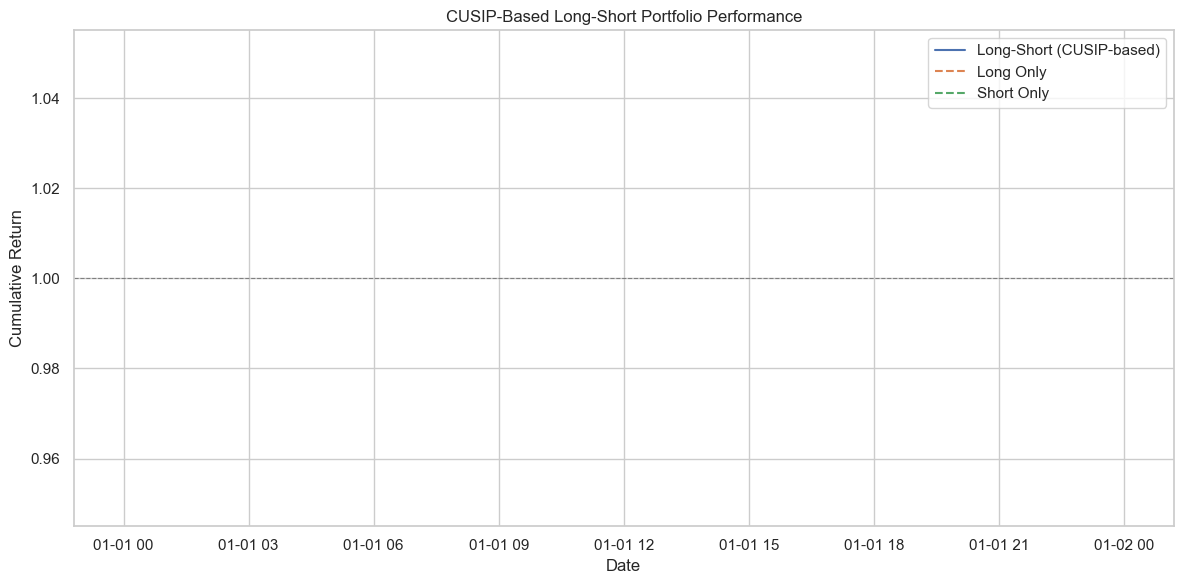

In [116]:
# Corrected: use string CUSIPs and map them to hypothetical PERMNOs
# For this example, we'll assume we can match PERMNOs directly to CUSIPs numerically for simulation
# In real CRSP data, you'd map via PERMNO <-> CUSIP table

# These are example mappings for simulation only
cusip_to_permno = {
    "427866108": 427866108,
    "42824CAC3": 42824,        # Simulated PERMNOs for non-numeric CUSIPs
    "432833108": 432833108,
    "404280BJ7": 404280,       # Simulated
    "452327109": 452327109,
    "48020Q107": 48020,
    "478160104": 478160104,
    "46625H100": 46625,
    "487836108": 487836108,
    "500643200": 500643200,
    "500754106": 500754106,
    "501044101": 501044101,
    "502413107": 502413107,
    "413875105": 413875105,
    "57636Q104": 57636
}

# Extract PERMNOs available in the dataset
available_permnos = set(returns_df.columns)
valid_permnos = [v for v in cusip_to_permno.values() if v in available_permnos]

# Sort the CUSIPs numerically to split
sorted_permnos = sorted(valid_permnos)
half = len(sorted_permnos) // 2
long_permnos = sorted_permnos[:half]
short_permnos = sorted_permnos[half:]

# Compute portfolio returns
cusip_based_returns = pd.DataFrame(index=returns_df.index)
cusip_based_returns["Long"] = returns_df[long_permnos].mean(axis=1)
cusip_based_returns["Short"] = returns_df[short_permnos].mean(axis=1)
cusip_based_returns["Long-Short"] = cusip_based_returns["Long"] - cusip_based_returns["Short"]

# Compute cumulative performance
cusip_cumulative = (1 + cusip_based_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cusip_cumulative.index, cusip_cumulative["Long-Short"], label="Long-Short (CUSIP-based)")
plt.plot(cusip_cumulative.index, cusip_cumulative["Long"], label="Long Only", linestyle='--')
plt.plot(cusip_cumulative.index, cusip_cumulative["Short"], label="Short Only", linestyle='--')
plt.title("CUSIP-Based Long-Short Portfolio Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.axhline(1, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
cusip_based_returns

,Long,Short,Long-Short
date,,,
2002-08-01,NaN,NaN,NaN
2002-08-02,NaN,NaN,NaN
2002-08-05,NaN,NaN,NaN
2002-08-06,NaN,NaN,NaN
2002-08-07,NaN,NaN,NaN
...,...,...,...
2024-12-24,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN
2024-12-27,NaN,NaN,NaN
